#**DataDose: Medical Cost Modeling**

##Objective:
The primary objective of this project is to analyze and model medical insurance charges using statistical and machine learning techniques. The project aims to identify key factors that influence insurance costs and develop predictive models to estimate individual medical expenses based on demographic and health-related attributes.

##Dataset Overview:
The dataset used is a modified version of the Medical Insurance Price Prediction dataset, originally sourced from Kaggle. It contains the following parameters:

Age: Age of the insured individual (integer)

Gender: Encoded as 1 for Female and 2 for Male

BMI: Body Mass Index (float)

No_of_Children: Number of children (integer)

Smoker: Encoded as 1 for Smoker and 2 for Non-smoker

Region: Encoded as 1 for Northwest, 2 for Northeast, 3 for Southwest, 4 for Southeast

Charges: Insurance charges in USD (float)

##Methodology:

Data Loading and Cleaning:
The dataset is imported into a pandas DataFrame. Missing or blank entries are identified and handled to ensure data quality.

Exploratory Data Analysis (EDA):
Data visualization and correlation analysis are conducted to uncover relationships between variables and the insurance charges. Particular attention is given to attributes such as smoking status, age, and BMI.

Model Development:

Linear Regression: Both single-variable and multi-variable linear regression models are developed to predict insurance charges.

Ridge Regression: A regularized regression model is applied to address potential multicollinearity and improve prediction performance.

Model Evaluation:
The models are evaluated using standard performance metrics such as Mean Squared Error (MSE) and R-squared (R²) to assess their accuracy and generalization capabilities.

##Tools & Technologies Used:
Python

Pandas, NumPy – data handling and cleaning

Matplotlib, Seaborn – data visualization

Scikit-learn – machine learning models and evaluation

Statsmodels (optional) – detailed statistical summaries

##Conclusion:
This project provides insights into the primary drivers of medical insurance costs and demonstrates the effectiveness of regression techniques in predictive modeling for healthcare-related financial data.

In [2]:
!pip install seaborn
import seaborn as sns

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [7]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [ ]:
print(df.head(10))

##Data Wrangling

In [ ]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns=headers
df.replace("?",np.nan, inplace=True)
df.head()

In [ ]:
df.info()

In [ ]:
is_smoker = df["smoker"].value_counts().idxmax()
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())


In [ ]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

##Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

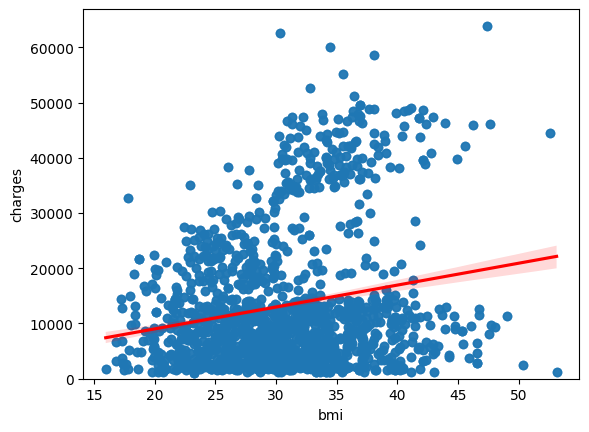

In [19]:
#Implement the regression plot for charges with respect to bmi.
sns.regplot(x="bmi",y="charges",data = df, line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

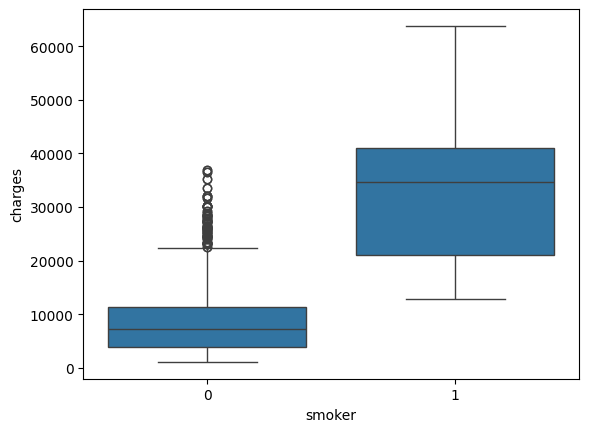

In [21]:
#Implement the box plot for charges with respect to smoker.
sns.boxplot(x="smoker", y="charges", data=df)


In [23]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


##Model Development

In [24]:
#Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R2 score of this model.
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


In [25]:
#Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.
# definition of Y and lm remain same as used in last cell.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [26]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.
# Y and Z use the same values as defined in previous cells
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452576213500093


##Model Refinement

In [27]:
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)


In [28]:
#Initialize a Ridge regressor that used hyperparameter -alpha=0. Fit the model using training data data subset. Print the R2 score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


In [29]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.783563110760815


#***AUTHOR***
**IMAD HUSAIN**